In [62]:

! kaggle datasets download -d ealaxi/paysim1 --unzip

Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0




  0%|          | 0.00/178M [00:00<?, ?B/s]
  1%|          | 1.00M/178M [00:00<00:30, 6.13MB/s]
  2%|▏         | 4.00M/178M [00:00<00:10, 16.8MB/s]
  5%|▍         | 8.00M/178M [00:00<00:06, 25.5MB/s]
  7%|▋         | 12.0M/178M [00:00<00:05, 30.7MB/s]
  9%|▉         | 16.0M/178M [00:00<00:05, 31.3MB/s]
 11%|█▏        | 20.0M/178M [00:00<00:04, 34.0MB/s]
 14%|█▎        | 24.0M/178M [00:00<00:05, 32.1MB/s]
 16%|█▌        | 28.0M/178M [00:00<00:04, 32.7MB/s]
 18%|█▊        | 32.0M/178M [00:01<00:04, 33.2MB/s]
 20%|██        | 36.0M/178M [00:01<00:04, 31.5MB/s]
 23%|██▎       | 40.0M/178M [00:01<00:04, 33.5MB/s]
 25%|██▍       | 44.0M/178M [00:01<00:04, 34.8MB/s]
 27%|██▋       | 48.0M/178M [00:01<00:03, 34.2MB/s]
 29%|██▉       | 52.0M/178M [00:01<00:03, 35.9MB/s]
 32%|███▏      | 56.0M/178M [00:01<00:03, 32.1MB/s]
 34%|███▍      | 60.0M/178M [00:02<00:03, 31.5MB/s]
 36%|███▌      | 64.0M/178M [00:02<00:03, 32.7MB/s]
 38%|███▊      | 68.0M/178M [00:02<00:03, 32.1MB/s]
 41%|████      | 72.

In [63]:
# Importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   


In [64]:
#import the dataset
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [65]:
# take a look at the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [66]:
# look for null values/missing values and also the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [67]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [55]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [68]:
# One-hot encode the "type" column
df_encoded = pd.get_dummies(df['type'])

# Convert the encoded values to integers
df_encoded = df_encoded.astype(int)

# Concatenate the encoded columns with the original dataframe
df_encoded = pd.concat([df, df_encoded], axis=1)

# Drop the original "type" column
df_encoded.drop('type', axis=1, inplace=True)

In [70]:
df_encoded.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [71]:
df = df_encoded

In [72]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [73]:
df["newbalanceDest"].value_counts()

newbalanceDest
0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
1254956.07          25
                ...   
188439.36            1
1347758.15           1
3878719.83           1
1605826.83           1
7360101.63           1
Name: count, Length: 3555499, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   nameOrig        object 
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   nameDest        object 
 6   oldbalanceDest  float64
 7   newbalanceDest  float64
 8   isFraud         int64  
 9   isFlaggedFraud  int64  
 10  CASH_IN         int32  
 11  CASH_OUT        int32  
 12  DEBIT           int32  
 13  PAYMENT         int32  
 14  TRANSFER        int32  
dtypes: float64(5), int32(5), int64(3), object(2)
memory usage: 606.8+ MB


In [75]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

<Axes: >

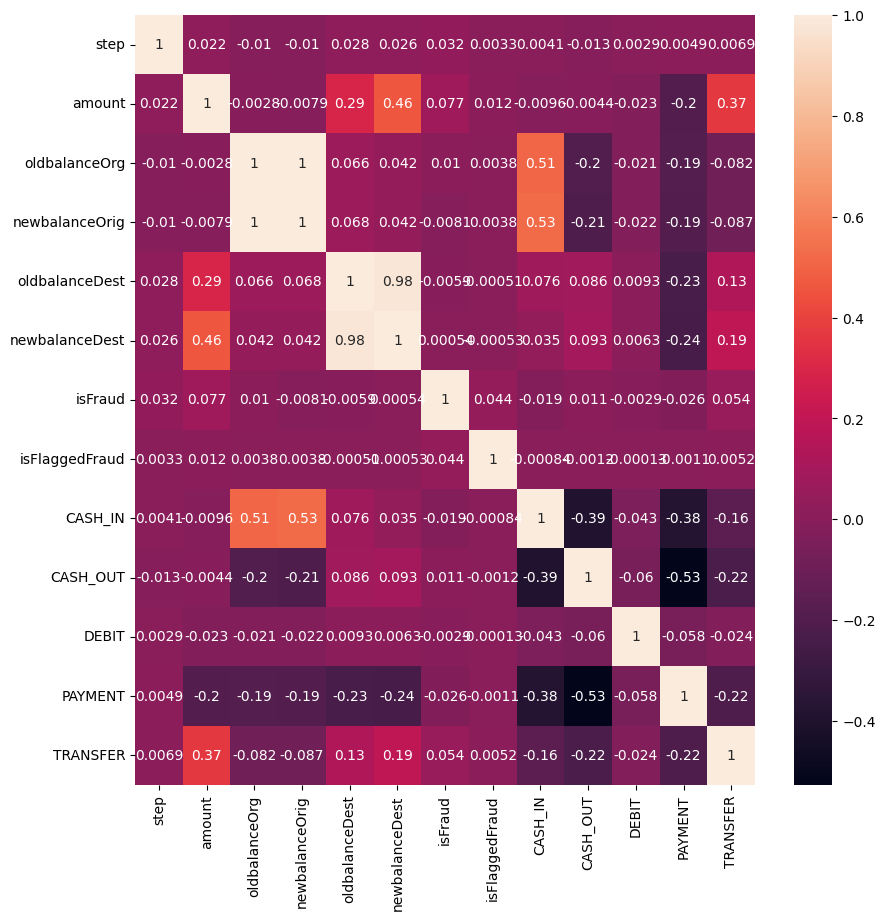

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [78]:
sns.pairplot(df)